# HW 4 : Clustering 
### Dvir Yerushalmi - 201271251
### Elad Laive - 304819600

In this HW we will use K-means variants on Fisher's Iris dataset

In [2]:
# relevant packges
%matplotlib inline
from sklearn import datasets, cluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# load data
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target

In [4]:
# Check data type and dim
print (str(type(X_iris)) + 'dimensions: '+str(X_iris.shape))
print (str(type(y_iris)) + 'dimensions: '+str(y_iris.shape))
print (X_iris[1,:])

<type 'numpy.ndarray'>dimensions: (150L, 4L)
<type 'numpy.ndarray'>dimensions: (150L,)
[ 4.9  3.   1.4  0.2]


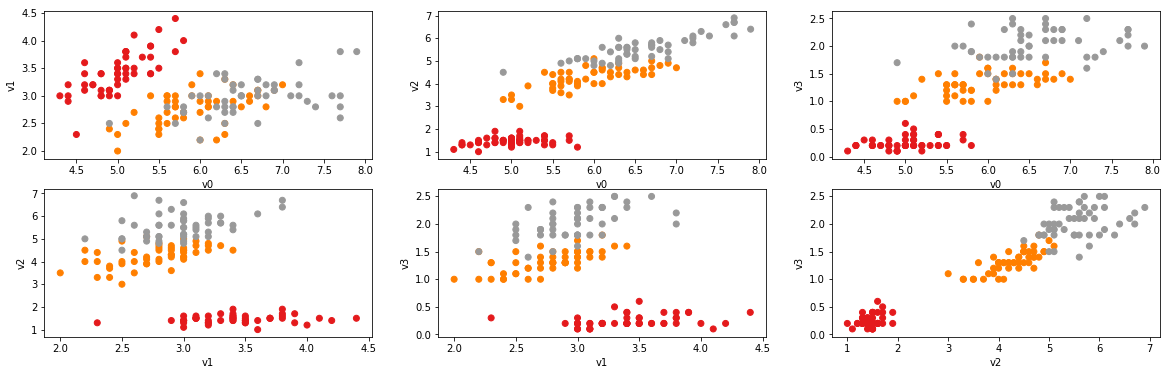

In [5]:
# Visualize 2d projections
fig = plt.figure(1, figsize=(20, 6))
itr = 1
for i in xrange(0,4):
    for j in xrange(i+1,4):
        plt.subplot(2,3,itr)
        plt.scatter(X_iris[:,i], X_iris[:,j], c=y_iris, cmap=plt.cm.Set1)
        plt.xlabel('v'+str(i))
        plt.ylabel('v'+str(j))
        itr+=1

[]

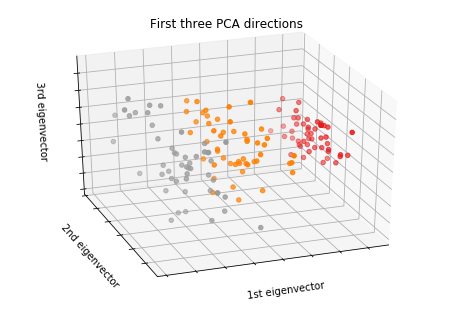

In [6]:
# Question 1 - fill in the code as required
fig = plt.figure(2)
X_reduced = np.zeros((y_iris.size,3))
#  Obtain first 3 PCA directions by using PCA method fit_transform 
######## Your Code Here ##########

X_reduced = PCA(n_components=3).fit_transform(X_iris)


##################################
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_iris,
           cmap=plt.cm.Set1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

In [47]:
# Question 2 - fill in the code as required
from sklearn.model_selection import GridSearchCV
######## Your Code Here ##########
# Cluster via KMeans from cluster
# tweak parameters/ use a grid search for best results


k_means = cluster.KMeans(n_clusters=3)

#define the parameters values that shoukd be searched
k_range = range(2,10)
n_range = range(10,50)

#create a param grid
param_grid = dict(init=['k-means++', 'random'], algorithm=['auto', 'full', 'elkan'])
grid=GridSearchCV(k_means,param_grid)
grid.fit(X_iris,y_iris)
print "the grid search best parameters are: " + str(grid.best_params_)


#explanations:
# since we know the number of clusters, it is irrelevent to practice on the number of clusters.
# furtheremore the built-in kmeans scoring will return the	Opposite of the value of X on the K-means objective in
# an unsupervised mannar, so using it to find the number of clusters is a mistake.

#in addition, it is clear that the with bigger max_iter and n_init and with lower tol
# the lower the error rate will be, therfore most probably we will get a better classification.
# so we didn't do a grid search on those parameters.



##################################
# cluster
k_means.fit(X_iris) 
# obtain labels
sk_k_means_labels = k_means.labels_

the grid search best parameters are: {'init': 'random', 'algorithm': 'full'}


In [8]:
# Question 3 - write a function that computes the number of correct labels
def correctLabelNum(y_iris,labels):
    correctLabels = 0
    ######## Your Code Here ##########
    # warnning: avoide trivial pitfulls verify your solution
    
    from itertools import permutations
    correctLabels = max(np.sum(np.array(p)[[labels]] == y_iris)
                 for p in permutations([0,1,2]))
    ############################# Explanation ####################################
    # We searched over all possible 3! permutations of labels, and looked for the one with lowest error in comparison
    #to the true labels
    ##################################
    return correctLabels

In [9]:
# check precentage of correct classification
print "sklearn K-means classified " + str(correctLabelNum(y_iris,sk_k_means_labels))+ ":"+ str(y_iris.size)+ " correctly"

sklearn K-means classified 134:150 correctly


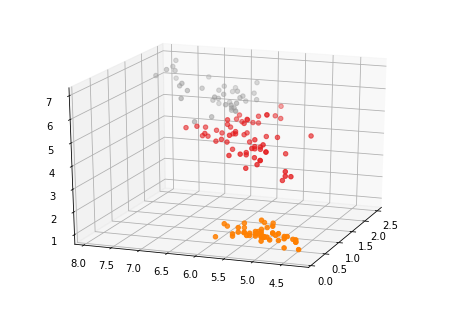

In [10]:
# Visualize clustering by sklearn K-means
fig = plt.figure(3)
ax = Axes3D(fig, elev=20, azim=200)
ax.scatter(X_iris[:,3], X_iris[:,0], X_iris[:,2], c=sk_k_means_labels,
           cmap=plt.cm.Set1);

In [11]:
# Question 4 - Implement K-means by yourself (don't use any k-mean libarary code )
#              your implementation outputs should be consisted with sklearn K-means
from scipy.spatial.distance import cdist 
class K_means_vanilla:
    def __init__(self,n_clusters=1,n_init = 200):
        self.n_clusters = n_clusters
        self.n_init = n_init
        ######## Your Code Here ##########
        
        

            ##################################
    def fit(self,X):
        """running n_init times the _fit_inner method that returns on;y one iteration
        (one initialization) of kmeans, and chooses the iteration with the best mse.
        """
            ######## Your Code Here ##########
    #         centers = np.random.rand(X)
        lowest_mse = float("inf")
        for i in range(self.n_init):
            new_labels, centers = self._fit_inner(X)
            current_mse = np.sum((X - centers[new_labels,:])**2)
            if current_mse < lowest_mse:
                lowest_mse = current_mse
                best_labels = new_labels
        self.ret_labels = best_labels
        return self



    def _fit_inner(self,X):
        """
        this method returns execution of only one "n_init", together with the results
        centers and the classifications
        """

        v_min, v_max = np.min(X,axis=0) , np.max(X,axis=0) # d X 1
        centers = np.random.random((self.n_clusters,1))*(v_max- v_min) + v_min  # n_clustersXd
        # the centers was created using broadcasting of d x 1 v_min and v_max matrix and n_cluster*1
        # of random samples
        # the initial positions of the centers are from d dimensional uniform sample,
        # each bound of the uniform sample is from the minimum samples to the maximum.
        labels = np.argmin(cdist(X,centers),axis=1)
        # cdist with default parameters calculates the euclidean distance between each column
        # in the X matrix to each column in the centers matrix, therfore we will have n * d matrix.
        # argmin will return for each row of this matrix the index of the smallest distance,
        # therefore the new label of this sample.
        while True:
            for i in range(self.n_clusters):
                centers[i] = np.average(X[labels==i],axis=0)
                # according to the euclidean distannce the center that minimize the norm 2 error
                # is the average of the locations of the samples which belongs to this center.
                # therefore each center coardinates are the average coordinates of the samples
                # which blong to this center.
                new_labels = np.argmin(cdist(X,centers),axis=1) #same explanation as above
                if np.all(new_labels == labels): #stoping when the labels stay the same. 
                    return new_labels, centers
                else:
                    labels = new_labels


        ##################################
    def labels(self):
        ######## Your Code Here ##########
        return self.ret_labels


        ##################################

Vanilla K-means classified 134:150 correctly


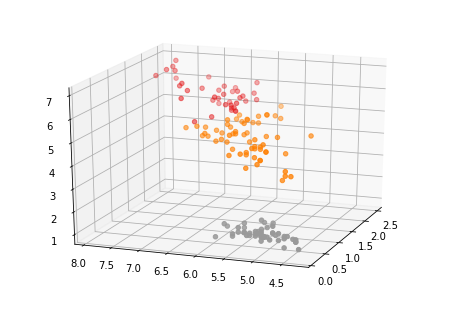

In [44]:
# Run vanilla K-means on data 
my_K_means_vanilla = K_means_vanilla(n_clusters = 3)
my_K_means_vanilla.fit(X_iris)
vanill_my_k_means_labels = my_K_means_vanilla.labels()

# Visualize vanilla K means clustering
fig = plt.figure(4)
ax = Axes3D(fig, elev=20, azim=200)
ax.scatter(X_iris[:,3], X_iris[:,0], X_iris[:,2], c=vanill_my_k_means_labels,
           cmap=plt.cm.Set1)

# check precentage of correct classification
print "Vanilla K-means classified " + str(correctLabelNum(y_iris,vanill_my_k_means_labels))+ ":"+ str(y_iris.size)+ " correctly"

In [13]:
from scipy.spatial.distance import cdist
# Question 5 - Implement K-Medoids (don't use any k-mean libarary code)
class K_Medoids:
    '''the norm-1 keeps the each center on one of the coordinated of a sample, because
    minimizing the cost finction according to this norm 1 distance function, results as
    setting the new centers, according to the median 
    (instead of average as of norm 2 squared distance)
    those the new distance will be minkiwski 1 which is the "manhatan distanece" or "norm 1"
    or abs distance..., and the new centers will be chosen according to the median.
    everything else stays exactly the same, therfore we will not duplicates the comments
    from there'''
    def __init__(self,n_clusters=1, n_init = 200):
        self.n_clusters = n_clusters
        self.n_init = n_init
        ######## Your Code Here ##########

  
    def fit(self,X):
        """running n_init times the _fit_inner method that returns on;y one iteration
        (one initialization) of kmeans, and chooses the iteration with the best mse."""
        ######## Your Code Here ##########
        lowest_error = float("inf")
        for i in range(self.n_init):
            new_labels, centers = self._fit_inner(X)
            current_error = np.sum(np.abs(X - centers[new_labels,:]))
            if current_error < lowest_error:
                lowest_error = current_error
                best_labels = new_labels
        self.ret_labels = best_labels
        return self

    
       
    def _fit_inner(self,X):
        """
        this method returns execution of only one "n_init", together with the results
        centers and the classifications
        """
        v_min = np.min(X,axis=0)
        v_max = np.max(X,axis=0)
        centers = np.random.random((self.n_clusters,1))*(v_max- v_min) + v_min
        labels = np.argmin(cdist(X,centers,'minkowski',1),axis=1) #manhatan distance
        while True:
            for i in range(self.n_clusters):
                centers[i] = np.median(X[labels==i],axis=0)
                new_labels = np.argmin(cdist(X,centers,'minkowski',1),axis=1)
                if np.all(new_labels == labels):
                    
                    return new_labels, centers 
                else:
                    labels = new_labels

        ##################################
    def labels(self):
        ######## Your Code Here ##########
        return self.ret_labels
        ##################################


K-Medoids classified 133:150 correctly


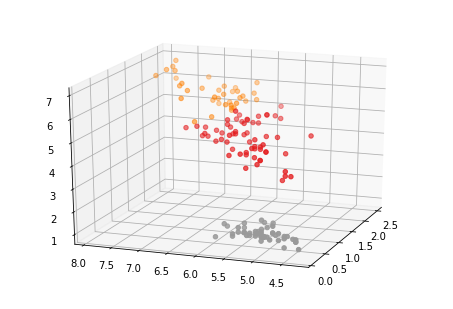

In [45]:
# Run K-Medoids on data 
my_K_Medoids = K_Medoids(n_clusters = 3)
my_K_Medoids.fit(X_iris)
my_K_Medoids_labels = my_K_Medoids.labels()

# Visualize vanilla K means clustering
fig = plt.figure(4)
ax = Axes3D(fig, elev=20, azim=200)
ax.scatter(X_iris[:,3], X_iris[:,0], X_iris[:,2], c=my_K_Medoids_labels,
           cmap=plt.cm.Set1)

# check precentage of correct classification
print "K-Medoids classified " + str(correctLabelNum(y_iris,my_K_Medoids_labels))+ ":"+ str(y_iris.size)+ " correctly"

In [15]:
# Question 6 - Implement soft K-Means (don't use any k-mean libarary code)
from scipy.spatial.distance import cdist
class soft_K_Means:
    def __init__(self,n_clusters=1,n_init = 20,epsilon = 1e-8, beta = 1.6):
         ######## Your Code Here ##########
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.eps = epsilon
        self.beta = beta
       

        
        
    def _fit_inner(self,X):
        """
        this method returns execution of only one "n_init", together with the results
        centers and the classifications
        """
        v_min , v_max = np.min(X,axis=0) , np.max(X,axis=0)
        R = np.random.random((self.n_clusters,1))*(v_max- v_min) + v_min # n_clustersXm
        O = float('inf')
        while True:
            P = np.exp(-self.beta*cdist(X,R)**2) 
            P = P/np.sum(P,axis = 1)[:,None] #nXn_clusters matrix with the assuagement
            # to the centers (to R)
            for j in range(self.n_clusters):
                R[j,:] = np.average(X,axis = 0,weights=P[:,j]) #this is the weighted
                #average as of line 7 in the soft-kmeans algorithm from lectures
            O_new = np.sum(cdist(X,R)*P) # each norm-2 distance is multiplied with respect
            #  to its assuagement factor (elementwise multiplication)
            #and then everything is summed up
            if np.abs(O_new - O) < self.eps:
                ret_labels = np.argmax(P,axis = 1)
                return ret_labels , O_new
            O = O_new
        

    def fit(self,X):
            """running n_init times the _fit_inner method that returns on;y one iteration
            (one initialization) of kmeans, and chooses the iteration with the best mse."""
            ######## Your Code Here ##########
            lowest_error = float("inf")
            for i in range(self.n_init):
                new_labels, current_error = self._fit_inner(X)
                if current_error < lowest_error:
                    lowest_error = current_error
                    best_labels = new_labels
            self.ret_labels = best_labels
            return self
    
       
                
        ##################################
    def labels(self):
        ######## Your Code Here ##########
        return self.ret_labels
        ##################################

soft K-means classified 135:150 correctly


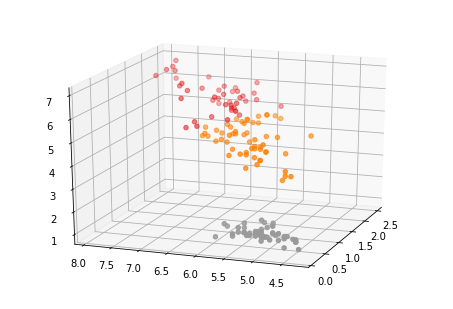

In [16]:
# Run soft K-Means on data 
my_soft_K_Means = soft_K_Means(n_clusters = 3)
my_soft_K_Means.fit(X_iris)
my_soft_K_Means_labels = my_soft_K_Means.labels()

# Visualize vanilla K means clustering
fig = plt.figure(4)
ax = Axes3D(fig, elev=20, azim=200)
ax.scatter(X_iris[:,3], X_iris[:,0], X_iris[:,2], c=my_soft_K_Means_labels,
           cmap=plt.cm.Set1)

# check precentage of correct classification
print "soft K-means classified " + str(correctLabelNum(y_iris,my_soft_K_Means_labels))+ ":"+ str(y_iris.size)+ " correctly"

1. * the parameter which is the most sensitive for performance is n_init. with n_init = 1 there is a lot of variance in the currect label num. because apparently there are a lot of local minimas, and it is probable that the algorithm will not converge to the global minima. we saw that the soft_kmeans is the nost immmune to convergance to the wrong minima, with in only in average one out of about 15 initialization it will not comverge to a minima that will cause less then 133 out of 155 of good classification. the k-means and k-medoids will converge to a result that will cause a classification of 133 out of 155 (or better) in about 40% of the trials.
   * In addition we saw that low beta (for example lower then 0.5) makes the soft k-means too soft, and it will separate most of the data to only 2 clusters (in order to maximize the entropy). higher beta will cause the soft k-means to become hard kmeans which yields a little worse results then using for example beta= 1.6.

2. The algorithm which was the easiest to code was the K-mediods because it was very similar to the vanilla kmeans we wrote previously, so in order to write the k-mediods we only needed to write small modifications to the vanilla kmneas (the distance function and classification for eaxmple) 

3. We think that nothing was hard for parameter tuning. beta was easy as we only had to find the threshold (with binary search on beta). most of the other parameters, the higher they are (for example n_init) the better results you get (and it is quite obvious), our impementation was very efficient (only 2 for's) in the 3 algorithms, so we get the results instantely, even with high n_init and low O. so we didn't had to find the real tradeoff.

4. The HW was written very well, It helped as inderstand the algorithms. we liked that we had the correctLabelNum as a sanity check for our algorithms, so we could compare our algorithm to the sklearn algorithm and easily find if our algorithm is working without bugs.
but if we must say something that we believe that need some improvement, it will be Question number 2, (the one with the grid search), the question was not 100% clear which parameters we had to run the grid seaerch on. moreover the result we got at this question were very 'stochastic'. for example sometime random initialization was better and sometimes k-means++.

DBSCAN:114:150 correctly


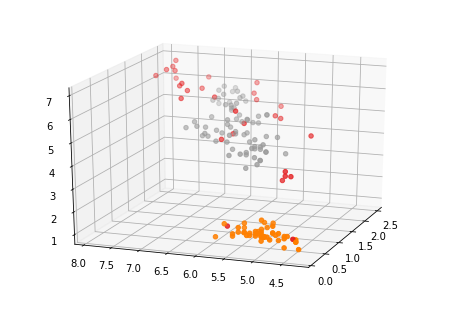

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples = 10)
dbscan = dbscan.fit(X_iris)
dbscan.labels_ + 1
# check precentage of correct classification
#print "sklearn K-means classified " + str(correctLabelNum(y_iris,dbscan_labels))+ ":"+ str(y_iris.size)+ " correctly"
# Visualize clustering by sklearn K-means
fig = plt.figure(3)
ax = Axes3D(fig, elev=20, azim=200)
ax.scatter(X_iris[:,3], X_iris[:,0], X_iris[:,2], c=dbscan.labels_,
           cmap=plt.cm.Set1);

print "DBSCAN:" + str(correctLabelNum(y_iris,lables))+ ":"+ str(y_iris.size)+ " correctly"

* We see that we get worse result then all the others algorithms we used